In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset with missing values
data = pd.read_csv('D:\\downloads\\sales_data_with_missing_values.csv')

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Fill missing numerical values with column mean (or you could use other methods)
data['Units Sold'].fillna(data['Units Sold'].mean(), inplace=True)
data['Sales Amount'].fillna(data['Sales Amount'].mean(), inplace=True)
data['Discount Applied'].fillna(data['Discount Applied'].mean(), inplace=True)

# Fill missing categorical values with mode
data['Customer Segment'].fillna(data['Customer Segment'].mode()[0], inplace=True)


Missing values per column:
 Date                 0
Store ID             0
Product ID           0
Units Sold          20
Sales Amount        20
Discount Applied    20
Customer Segment    20
dtype: int64


C:\Users\vishn\AppData\Local\Temp\ipykernel_26656\3402216911.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Units Sold'].fillna(data['Units Sold'].mean(), inplace=True)
C:\Users\vishn\AppData\Local\Temp\ipykernel_26656\3402216911.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [2]:
# Daily total sales and units sold
daily_data = data.groupby('Date').agg({
    'Units Sold': 'sum',
    'Sales Amount': 'sum'
}).reset_index()

print("Daily Aggregated Data:\n", daily_data.head())


Daily Aggregated Data:
         Date  Units Sold  Sales Amount
0 2024-11-01  493.133333   4836.046444
1 2024-11-02  325.000000   3158.530000
2 2024-11-03  134.000000   1748.220000
3 2024-11-04  432.266667   3050.793222
4 2024-11-05  427.133333   4924.850000


In [3]:
# Aggregate by Store
store_data = data.groupby('Store ID').agg({
    'Units Sold': 'sum',
    'Sales Amount': 'sum'
}).reset_index()

# Aggregate by Product
product_data = data.groupby('Product ID').agg({
    'Units Sold': 'sum',
    'Sales Amount': 'sum'
}).reset_index()

print("Store Aggregated Data:\n", store_data.head())
print("Product Aggregated Data:\n", product_data.head())


Store Aggregated Data:
   Store ID   Units Sold  Sales Amount
0     S001  3185.800000  26493.662556
1     S002  2741.666667  27030.102889
2     S003  2402.666667  24579.309333
3     S004  2496.533333  17719.569667
Product Aggregated Data:
   Product ID   Units Sold  Sales Amount
0       P001  2414.666667  22205.636444
1       P002  2915.933333  24288.776111
2       P003  2603.666667  25093.155778
3       P004  2892.400000  24235.076111


In [4]:
# Total and Average sales per Product
product_sales = data.groupby('Product ID').agg({
    'Sales Amount': ['sum', 'mean']
})
product_sales.columns = ['Total Sales', 'Average Sales']
product_sales = product_sales.reset_index()
print("Sales per Product:\n", product_sales)


Sales per Product:
   Product ID   Total Sales  Average Sales
0       P001  22205.636444     462.617426
1       P002  24288.776111     467.091848
2       P003  25093.155778     482.560688
3       P004  24235.076111     504.897419


In [5]:
# Store with the highest total sales
top_store = store_data.loc[store_data['Sales Amount'].idxmax()]
print("Top-performing store:\n", top_store)


Top-performing store:
 Store ID                S002
Units Sold       2741.666667
Sales Amount    27030.102889
Name: 1, dtype: object


In [6]:
# Correlation between Discount Applied and Sales Amount
discount_correlation = data['Discount Applied'].corr(data['Sales Amount'])
print("Correlation between Discount Applied and Sales Amount:", discount_correlation)


Correlation between Discount Applied and Sales Amount: 0.008503779028020441


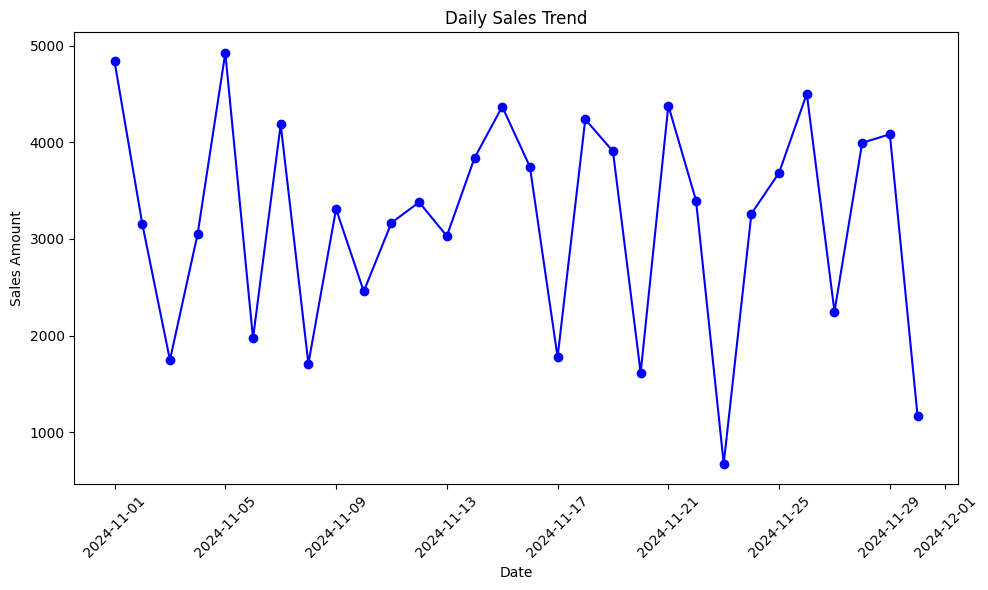

In [7]:
# Plot daily sales trend
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Date'], daily_data['Sales Amount'], marker='o', color='b')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vishn\AppData\Local\Temp\ipykernel_26656\2908057283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store ID', y='Sales Amount', data=store_data, palette='viridis')


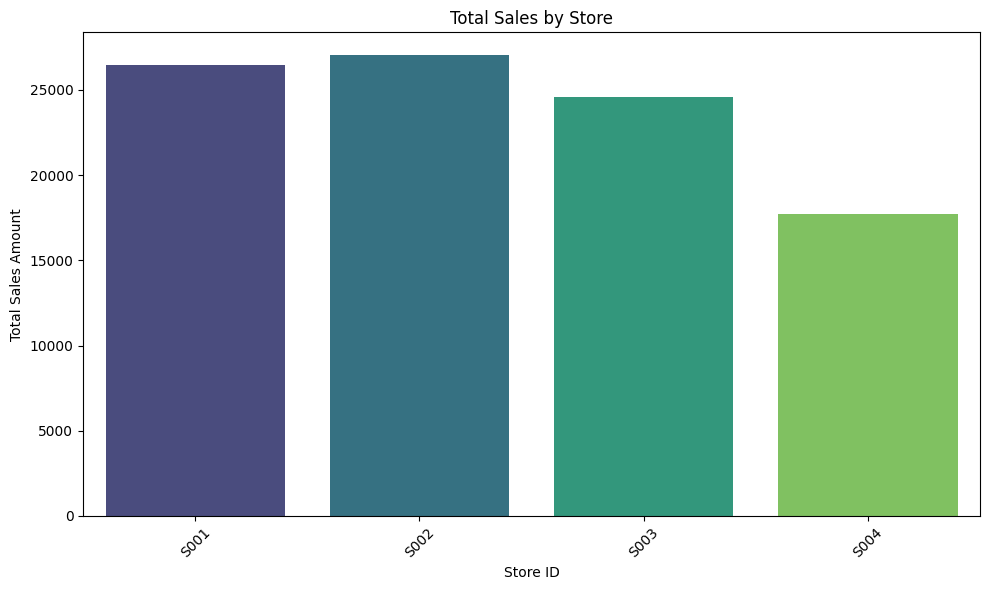

In [8]:
# Bar plot of total sales by store
plt.figure(figsize=(10, 6))
sns.barplot(x='Store ID', y='Sales Amount', data=store_data, palette='viridis')
plt.title("Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vishn\AppData\Local\Temp\ipykernel_26656\982053825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product ID', y='Sales Amount', data=product_data, palette='coolwarm')


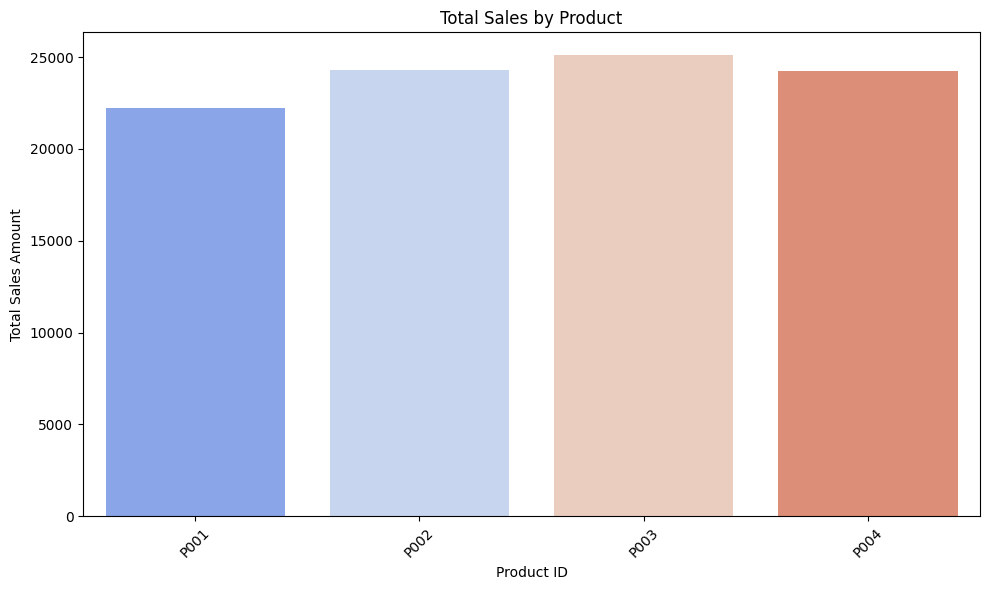

In [9]:
# Bar plot of total sales by product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product ID', y='Sales Amount', data=product_data, palette='coolwarm')
plt.title("Total Sales by Product")
plt.xlabel("Product ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


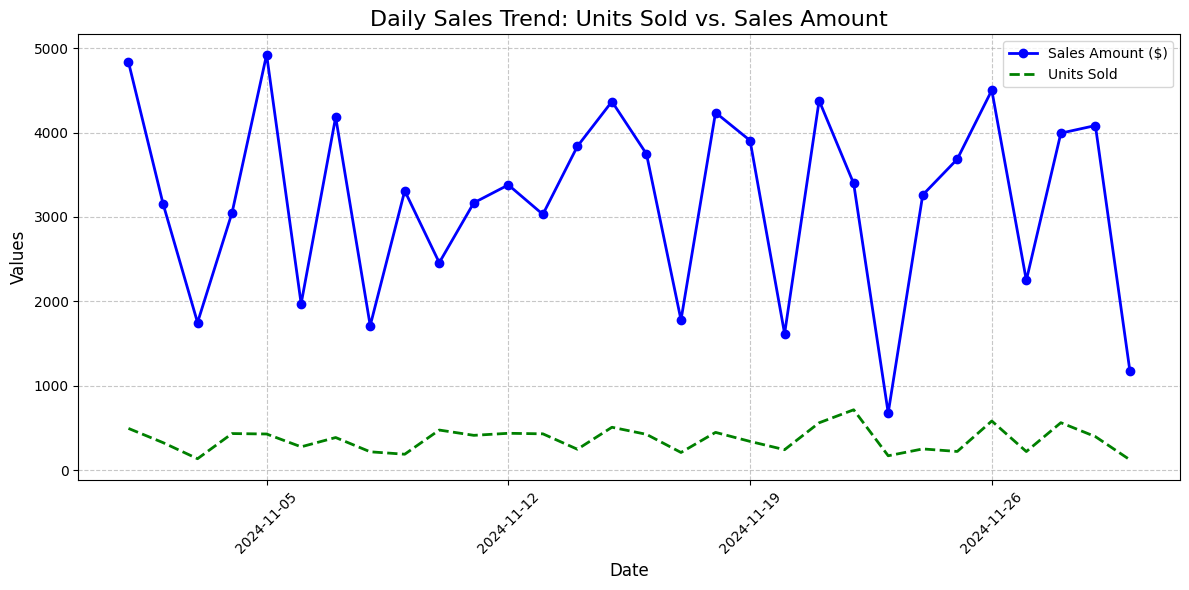

In [10]:
import matplotlib.dates as mdates

# Plot daily sales trend with Units Sold and Sales Amount
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Sales Amount'], label="Sales Amount ($)", color='b', marker='o', linewidth=2)
plt.plot(daily_data['Date'], daily_data['Units Sold'], label="Units Sold", color='g', linestyle='--', linewidth=2)

# Enhancing plot with titles and grid
plt.title("Daily Sales Trend: Units Sold vs. Sales Amount", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis for better date readability
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\vishn\AppData\Local\Temp\ipykernel_26656\3595631706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store ID', y='Sales Amount', data=sorted_store_data, palette='viridis')


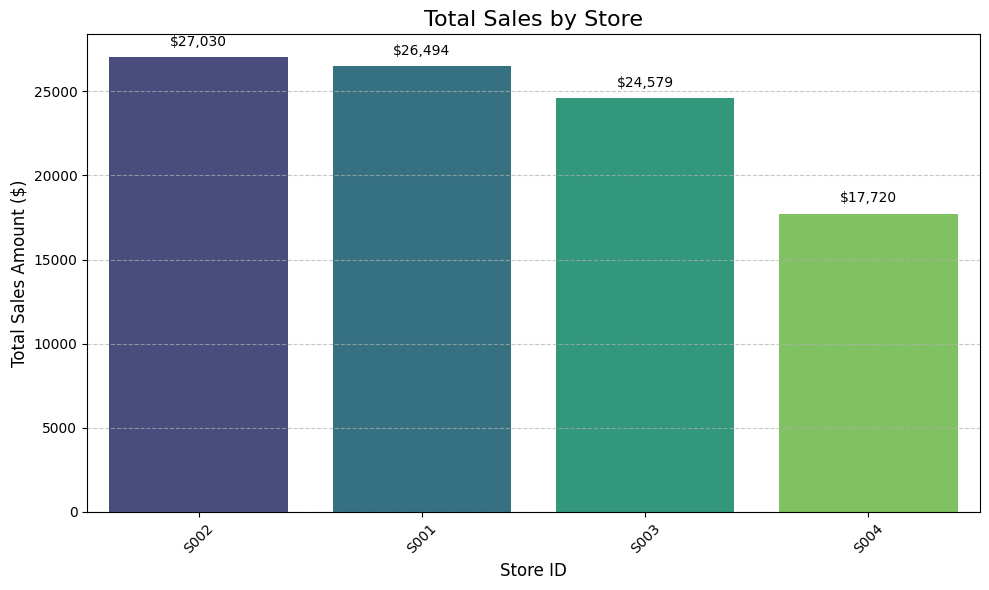

In [11]:
# Bar plot of total sales by store with labels
plt.figure(figsize=(10, 6))
sorted_store_data = store_data.sort_values(by='Sales Amount', ascending=False)
sns.barplot(x='Store ID', y='Sales Amount', data=sorted_store_data, palette='viridis')

# Adding data labels
for index, value in enumerate(sorted_store_data['Sales Amount']):
    plt.text(index, value + 500, f"${value:,.0f}", ha='center', va='bottom')

plt.title("Total Sales by Store", fontsize=16)
plt.xlabel("Store ID", fontsize=12)
plt.ylabel("Total Sales Amount ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\vishn\AppData\Local\Temp\ipykernel_26656\1615468365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Amount', y='Product ID', data=sorted_product_data, palette='coolwarm', label="Sales Amount")


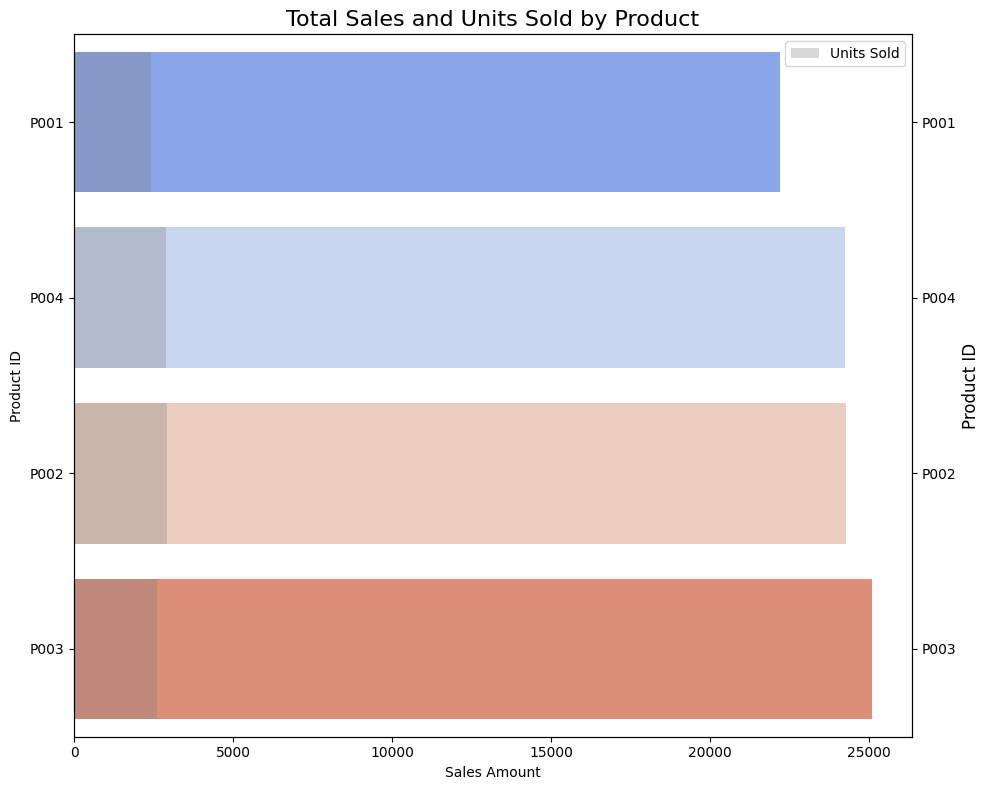

In [12]:
# Horizontal bar plot of total sales by product with units sold
plt.figure(figsize=(10, 8))
sorted_product_data = product_data.sort_values(by='Sales Amount', ascending=True)
sns.barplot(x='Sales Amount', y='Product ID', data=sorted_product_data, palette='coolwarm', label="Sales Amount")

# Add a secondary bar for Units Sold to the right
plt.twinx()
sns.barplot(x='Units Sold', y='Product ID', data=sorted_product_data, color="gray", alpha=0.3, label="Units Sold")

# Titles and labels
plt.title("Total Sales and Units Sold by Product", fontsize=16)
plt.xlabel("Sales Amount ($)", fontsize=12)
plt.ylabel("Product ID", fontsize=12)
plt.legend(loc="upper right")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


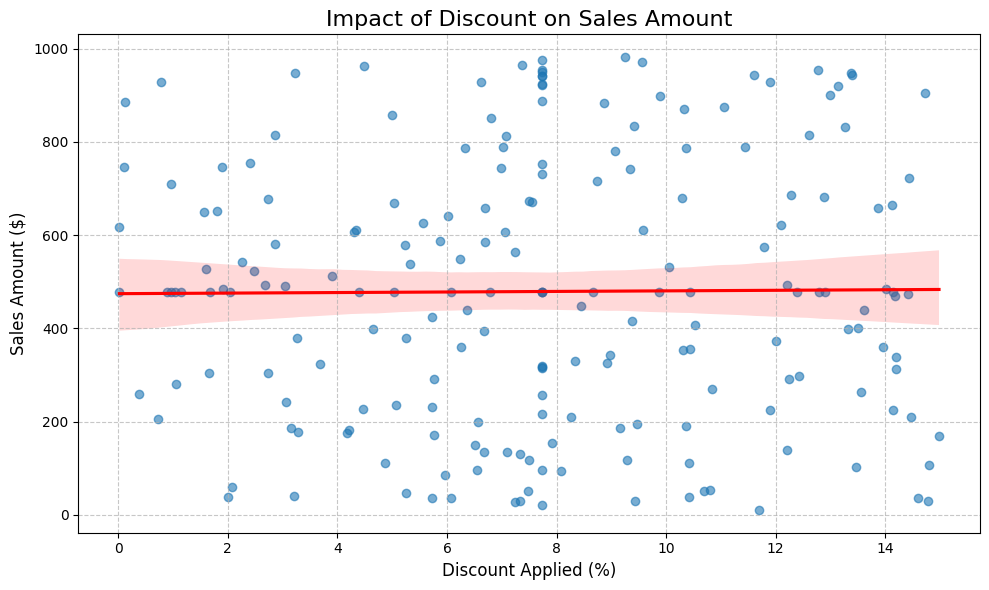

In [13]:
# Scatter plot with regression line for discount impact
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount Applied', y='Sales Amount', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Titles and grid
plt.title("Impact of Discount on Sales Amount", fontsize=16)
plt.xlabel("Discount Applied (%)", fontsize=12)
plt.ylabel("Sales Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
import plotly.express as px
import plotly.graph_objects as go

In [15]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [18]:
# Aggregate data by date
daily_data = data.groupby('Date').agg({
    'Units Sold': 'sum',
    'Sales Amount': 'sum'
}).reset_index()

# Plotting sales trend over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_data['Date'], y=daily_data['Sales Amount'], mode='lines+markers', name='Sales Amount'))
fig.add_trace(go.Scatter(x=daily_data['Date'], y=daily_data['Units Sold'], mode='lines+markers', name='Units Sold', yaxis="y2"))

# Customizing layout for dual-axis plot
fig.update_layout(
    title="Daily Sales Trend: Units Sold vs. Sales Amount",
    xaxis_title="Date",
    yaxis_title="Sales Amount ($)",
    yaxis2=dict(title="Units Sold", overlaying="y", side="right"),
    hovermode="x unified"
)

fig.show()


In [17]:
# Aggregate by Store
store_data = data.groupby('Store ID').agg({
    'Units Sold': 'sum',
    'Sales Amount': 'sum'
}).reset_index()

# Plot sales by store
fig = px.bar(store_data, x='Store ID', y='Sales Amount', color='Store ID',
             title="Total Sales by Store",
             labels={'Sales Amount': 'Total Sales ($)'},
             hover_data={'Units Sold': True})

fig.update_layout(xaxis_title="Store ID", yaxis_title="Total Sales Amount ($)")
fig.show()


In [19]:
# Aggregate by Product
product_data = data.groupby('Product ID').agg({
    'Units Sold': 'sum',
    'Sales Amount': 'sum'
}).reset_index()

# Plot Sales and Units Sold by product in a horizontal bar chart
fig = px.bar(product_data, y='Product ID', x='Sales Amount', orientation='h',
             title="Total Sales by Product",
             color='Sales Amount',
             labels={'Sales Amount': 'Total Sales ($)', 'Product ID': 'Product'},
             hover_data={'Units Sold': True})

fig.update_layout(xaxis_title="Sales Amount ($)", yaxis_title="Product ID")
fig.show()


In [20]:
# Scatter plot with trend line for discount vs. sales amount
fig = px.scatter(data, x='Discount Applied', y='Sales Amount', trendline='ols',
                 title="Impact of Discount on Sales Amount",
                 labels={'Discount Applied': 'Discount (%)', 'Sales Amount': 'Sales Amount ($)'})

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


In [22]:
# Aggregate daily sales by Date and Store ID
daily_sales = data.groupby(['Date', 'Store ID']).agg({'Sales Amount': 'sum'}).reset_index()

# Create an animated bar chart
fig = px.bar(
    daily_sales,
    x='Sales Amount',
    y='Store ID',
    color='Store ID',
    animation_frame=daily_sales['Date'].dt.strftime('%Y-%m-%d'),  # Format date for better animation
    title="Sales Amount by Store Over Time",
    labels={'Sales Amount': 'Total Sales ($)', 'Store ID': 'Store'},
    orientation='h'
)

# Customize layout
fig.update_layout(
    xaxis_title="Sales Amount ($)",
    yaxis_title="Store ID",
    yaxis={'categoryorder': 'total ascending'},
    hovermode="x"
)

fig.show()